# Loan Prediction Excercise

## 1. Load packages

In [106]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


## 2. Load data

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')

In [3]:
test = pd.read_csv('test_lAUu6dG.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train_original = train.copy()

In [7]:
test_original = test.copy()

## 3. Understanding the data 

In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
test.shape

(367, 12)

In [12]:
train.shape

(614, 13)

## 4. Univariate analysis

### 4.1 Visualising the dependent variable

In [13]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

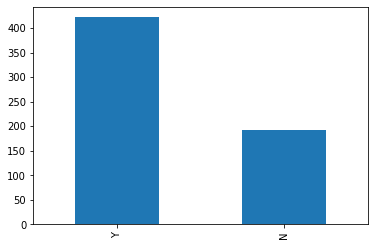

In [14]:
train['Loan_Status'].value_counts().plot.bar()

### 4.2 Visualising the independent variables

#### 4.2.1 Categorical variables
Gender	Married	Education	Self_Employed	Loan_Status

<AxesSubplot:title={'center':'Self_Employed'}>

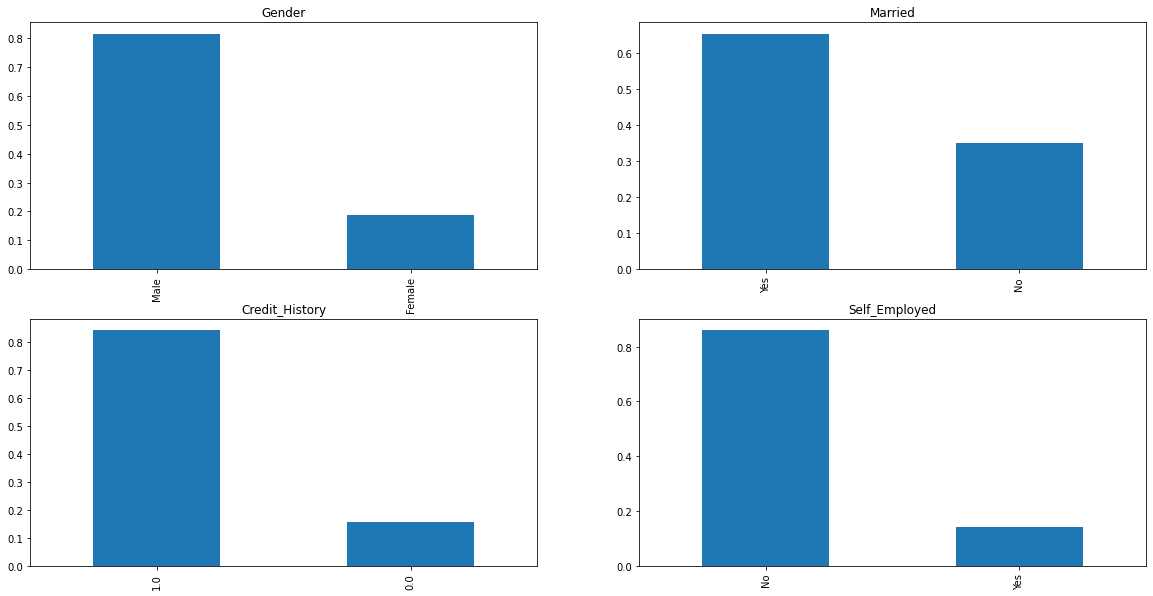

In [15]:
plt.figure(1)
plt.subplot(221)
train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")

plt.subplot(222)
train["Married"].value_counts(normalize=True).plot.bar(title="Married")

plt.subplot(223)
train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History")

plt.subplot(224)
train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self_Employed")


#### 4.2.2 Ordinal variables
Dependent Education Property_Area

<AxesSubplot:title={'center':'Property_Area'}>

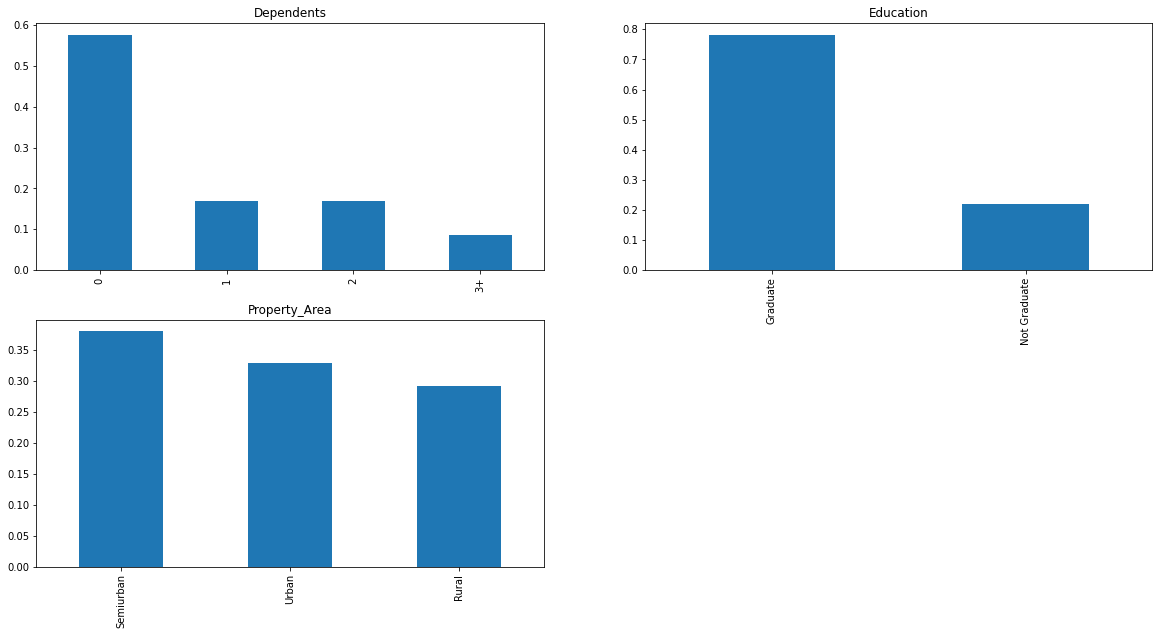

In [16]:
plt.figure(1)
plt.subplot(221)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Dependents")

plt.subplot(222)
train["Education"].value_counts(normalize=True).plot.bar(title="Education")

plt.subplot(223)
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")


#### 4.2.3 Numerical variables
ApplicantIncome CoapplilcantIncome LoanAmount 

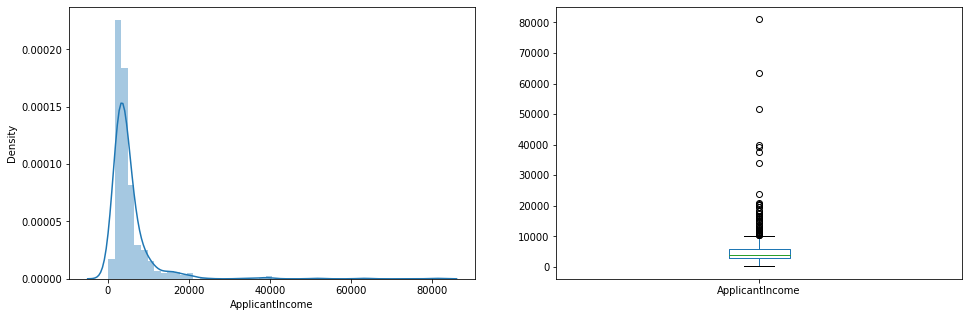

In [17]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']);
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

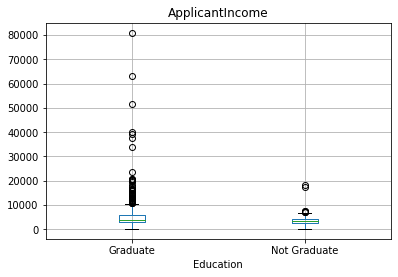

In [18]:
#split by Education
train.boxplot(column="ApplicantIncome", by="Education")
plt.suptitle("")


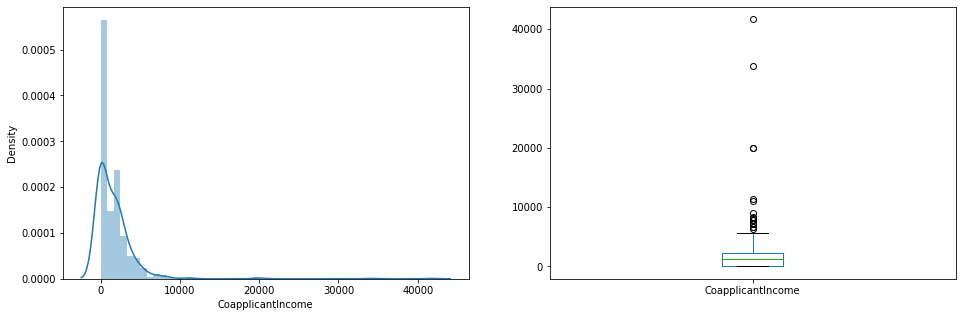

In [19]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

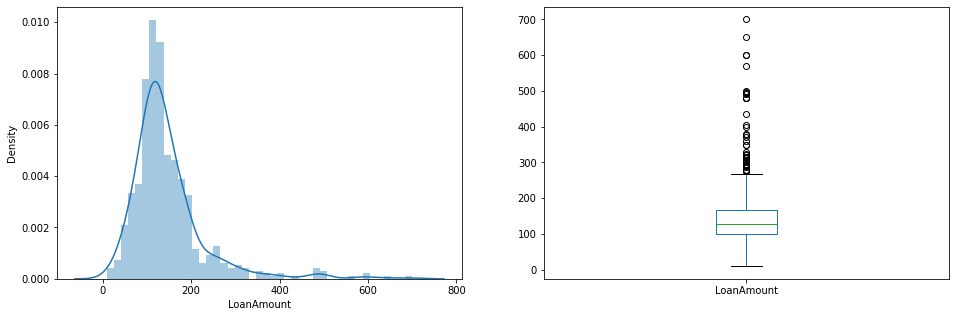

In [20]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['LoanAmount']);
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

## 5. Bivariate analysis

### 5.1 Categorical independent vs Target variable

In [21]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])

In [22]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [23]:
Gender.div(Gender.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


<AxesSubplot:xlabel='Gender'>

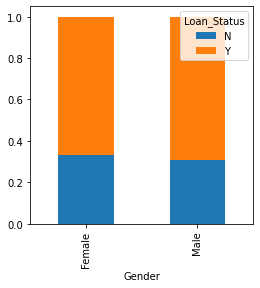

In [24]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

In [25]:
cat_vars = train[['Married','Dependents','Education','Self_Employed']]

In [26]:
cat_vars.head()

,Married,Dependents,Education,Self_Employed
0,No,0,Graduate,No
1,Yes,1,Graduate,No
2,Yes,0,Graduate,Yes
3,Yes,0,Not Graduate,No
4,No,0,Graduate,No


Married
Dependents
Education
Self_Employed
Credit_History
Property_Area


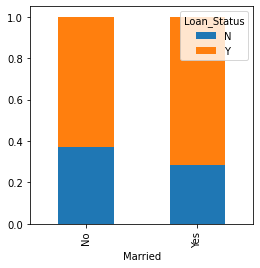

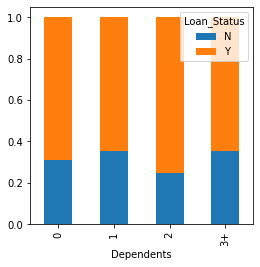

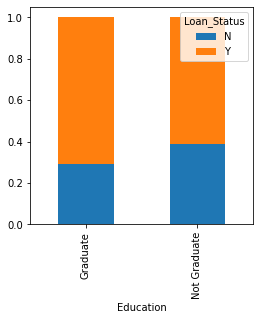

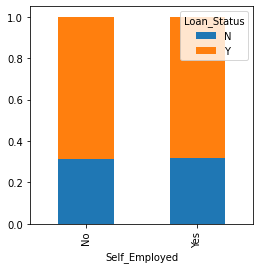

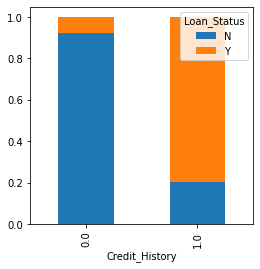

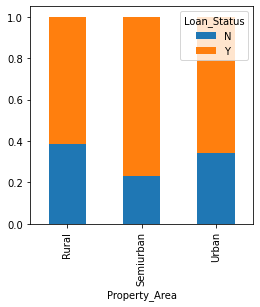

In [27]:
for iteration, col in enumerate(train[['Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']]):
    print(col)
    values = train[col]
    var = pd.crosstab(values,train['Loan_Status'])
    var.div(var.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))


### 5.2 Numerical variables vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

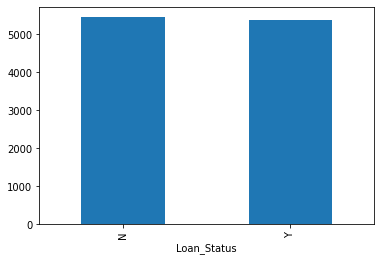

In [28]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [29]:
bins=[0,2500,4000,6000,81000] 
group = ['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])

In [30]:
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


In [31]:
def check_stacked(cat,dep):
    var = pd.crosstab(cat,dep)
    var.div(var.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
    plt.xlabel(cat.name)
    plt.ylabel('Percentage')


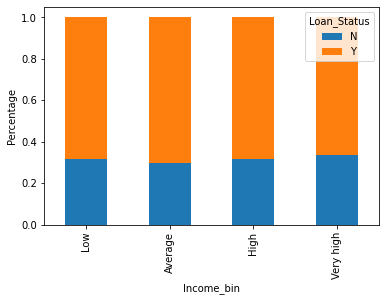

In [32]:
check_stacked(train['Income_bin'],train['Loan_Status'])

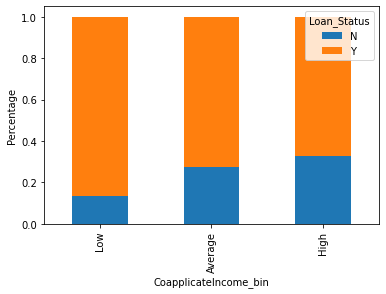

In [33]:
bins=[0,1000,3000,42000] 
group = ['Low','Average','High']
train['CoapplicateIncome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

check_stacked(train['CoapplicateIncome_bin'],train['Loan_Status'])

In [34]:
train['Total_Income']=train['CoapplicantIncome']+train['ApplicantIncome']

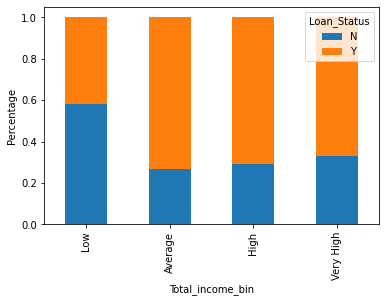

In [35]:
bins=[0,2500,4000,6000,81000] 
group = ['Low','Average','High','Very High']
train['Total_income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

check_stacked(train['Total_income_bin'],train['Loan_Status'])

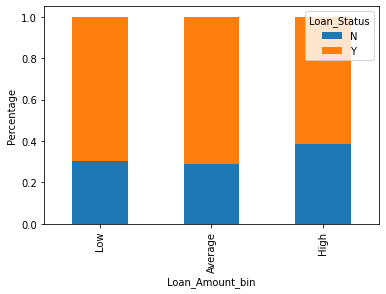

In [36]:
bins=[0,100,200,700] 
group = ['Low','Average','High']
train['Loan_Amount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

check_stacked(train['Loan_Amount_bin'],train['Loan_Status'])

In [37]:
### drop the bins and change some categorical in numerical so we can check correlation 

In [38]:
train = train.drop(['Income_bin','CoapplicateIncome_bin','Loan_Amount_bin','Total_income_bin','Total_Income'], axis=1) 

In [39]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

<AxesSubplot:>

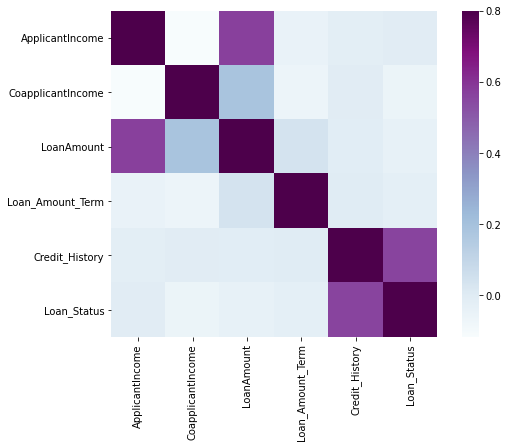

In [40]:
matrix=train.corr()
matrix
ax = plt.subplots(figsize=(9,6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [41]:
matrix


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


## 6. Missing value and outlier treatment

### 6.1 Missing value treatment

In [42]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
# replace missing values with mode in categorical vars

In [44]:
def fillna_mode(df):
        df.fillna(df.mode()[0],inplace=True)
        

In [45]:
fillna_mode(train['Gender'])
fillna_mode(train['Married'])
fillna_mode(train['Dependents'])
fillna_mode(train['Self_Employed'])
fillna_mode(train['Credit_History'])


In [46]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
# Numerical values can be imputed by the mode or mean
# -> many same values: mode
# -> broad distribution with outliers: median

In [48]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [49]:
fillna_mode(train['Loan_Amount_Term'])

In [50]:
train['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [51]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [52]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
fillna_mode(test['Gender'])
fillna_mode(test['Married'])
fillna_mode(test['Dependents'])
fillna_mode(test['Self_Employed'])
fillna_mode(test['Credit_History'])
fillna_mode(test['Loan_Amount_Term'])
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

### 6.2 Outlier treatment

In [54]:
#by applying a log transformation, the impact of extremes gets reduced

<AxesSubplot:>

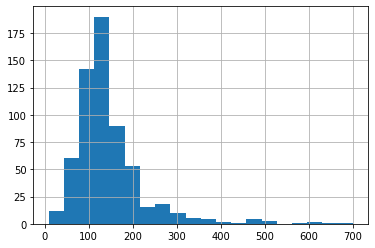

In [55]:
train['LoanAmount'].hist(bins=20)

<AxesSubplot:>

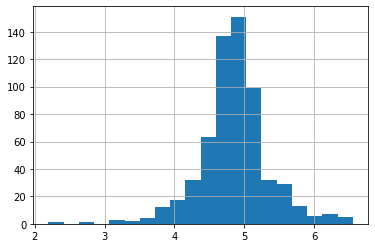

In [56]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [57]:
test['LoanAmount_log']=np.log(test['LoanAmount'])

## 7. Model building

### 7.1 Logistic Regression

#### 7.1.1 drop independents which have no effect on the dependent

In [58]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [59]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

#### 7.1.2 drop the dependent and save it in another dataset

In [60]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [61]:
y = train.Loan_Status
x = train.drop('Loan_Status',1)

#### 7.1.3 create dummy variables from the categorical data 

In [62]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

#### 7.1.4 create a validation set 

In [63]:
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.3)

#### 7.1.5 run the model 

In [64]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [65]:
LogisticRegression(C=1.0, 
                   class_weight=None, 
                   dual=False, 
                   fit_intercept=True, 
                   intercept_scaling=1, 
                   max_iter=100, 
                   multi_class='ovr', 
                   n_jobs=1, 
                   penalty='12', 
                   random_state=1,
                   solver='liblinear',
                   tol=0.0001, 
                   verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [66]:
pred_cv=model.predict(x_cv)

In [67]:
accuracy_score(y_cv,pred_cv)

0.7891891891891892

In [68]:
pred_test=model.predict(test)

## 8. Validation

In [69]:
# Using K-fold validationab

In [70]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score',score)
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]



1 of kfold 5
Accuracy score 0.8048780487804879

2 of kfold 5
Accuracy score 0.8373983739837398

3 of kfold 5
Accuracy score 0.7804878048780488

4 of kfold 5
Accuracy score 0.7886178861788617

5 of kfold 5
Accuracy score 0.7950819672131147


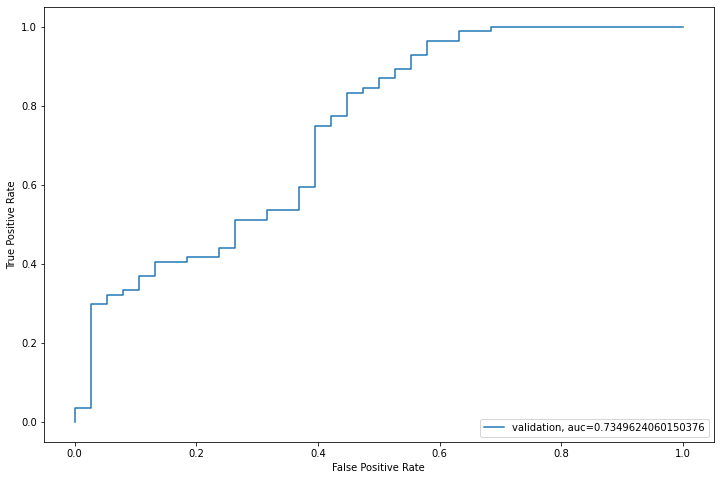

In [71]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize = (12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## 9. Feature Engineering

In [72]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']
test['TotalIncome']=test['ApplicantIncome']+test['CoapplicantIncome']

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

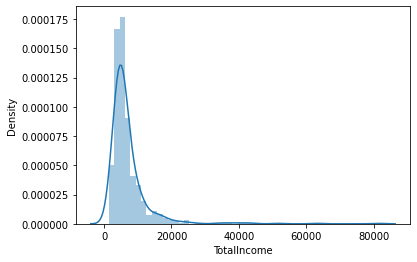

In [73]:
sns.distplot(train['TotalIncome'])

In [95]:
train['TotalIncome_log']=np.log(train['TotalIncome'])
test['TotalIncome_log']=np.log(test['TotalIncome'])


<AxesSubplot:xlabel='TotalIncome_log', ylabel='Density'>

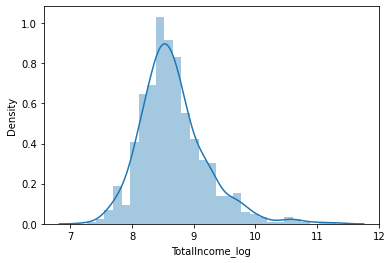

In [75]:
sns.distplot(train['TotalIncome_log'])

In [77]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']


<AxesSubplot:xlabel='EMI', ylabel='Density'>

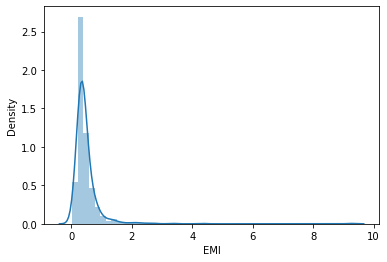

In [78]:
sns.distplot(train['EMI'])

In [80]:
train['Balance Income']=train['TotalIncome']-(train['EMI']*1000)
test['Balance Income']=test['TotalIncome']-(test['EMI']*1000)

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

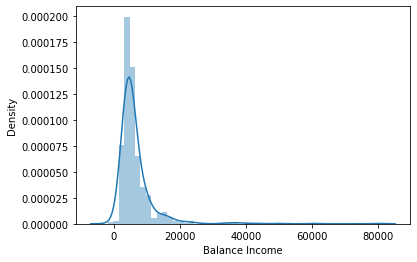

In [81]:
sns.distplot(train['Balance Income'])

In [84]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)

KeyError: "['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'] not found in axis"

In [85]:
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'TotalIncome', 'TotalIncome_log', 'EMI', 'Balance Income'],
      dtype='object')

In [86]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'TotalIncome', 'EMI', 'Balance Income'],
      dtype='object')

In [87]:
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)

In [88]:
test.columns

Index(['Credit_History', 'LoanAmount_log', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_3', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'TotalIncome', 'EMI', 'Balance Income'],
      dtype='object')

## 10. Final model building

In [89]:
y = train.Loan_Status
x = train.drop('Loan_Status',1)

### 10.1 Logistic Regression

In [96]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score',score)
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy score 0.7886178861788617

2 of kfold 5
Accuracy score 0.6910569105691057

3 of kfold 5
Accuracy score 0.6666666666666666

4 of kfold 5
Accuracy score 0.7967479674796748

5 of kfold 5
Accuracy score 0.680327868852459


In [97]:
x.shape

(614, 21)

In [98]:
test.shape

(367, 21)

### 10.2 Decision Tree

In [101]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score',score)
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy score 0.7398373983739838

2 of kfold 5
Accuracy score 0.6991869918699187

3 of kfold 5
Accuracy score 0.7560975609756098

4 of kfold 5
Accuracy score 0.7073170731707317

5 of kfold 5
Accuracy score 0.6721311475409836


### 10.3 Random Forest

In [104]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=10)
    
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score',score)
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy score 0.8292682926829268

2 of kfold 5
Accuracy score 0.8130081300813008

3 of kfold 5
Accuracy score 0.7723577235772358

4 of kfold 5
Accuracy score 0.8048780487804879

5 of kfold 5
Accuracy score 0.7540983606557377


In [107]:
#provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators

In [109]:
paramgrid={'max_depth':list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [110]:
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.3,random_state=1)

In [117]:
#Fit the fird search model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, 
             error_score='raise',
             param_grid={'max_depth':[1,3,5,7,9,11,13,15,17,19],
                         'n_estimators':[1,21,41,61,81,101,121,141,161,181]},
             pre_dispatch='2*n_jobs',
             refit=True,
             return_train_score='warn',
             scoring=None, 
             verbose=0,
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight=None,
                                              criterion='gini',
                                              max_depth=None, 
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10,
                                             n_jobs=1,
                                             oob_score=False,
                                             random_state=1,
                                             verbose=0,
                                             warm_start=False))

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=1,
                                              random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [118]:
#Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [119]:
RandomForestClassifier(bootstrap=True,
                       class_weight=None,
                       criterion='gini',
                       max_depth=5,
                       max_features='auto',
                       max_leaf_nodes=None,min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=41,
                                             n_jobs=1,
                                             oob_score=False,
                                             random_state=1,
                                             verbose=0,
                                             warm_start=False)

RandomForestClassifier(max_depth=5, n_estimators=41, n_jobs=1, random_state=1)

In [120]:
# rerunning with optimal parameters

In [121]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=5,n_estimators=41)
    
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score',score)
    i+=1 
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy score 0.8211382113821138

2 of kfold 5
Accuracy score 0.8373983739837398

3 of kfold 5
Accuracy score 0.7804878048780488

4 of kfold 5
Accuracy score 0.7804878048780488

5 of kfold 5
Accuracy score 0.7868852459016393


In [122]:
# what are the important features

<AxesSubplot:>

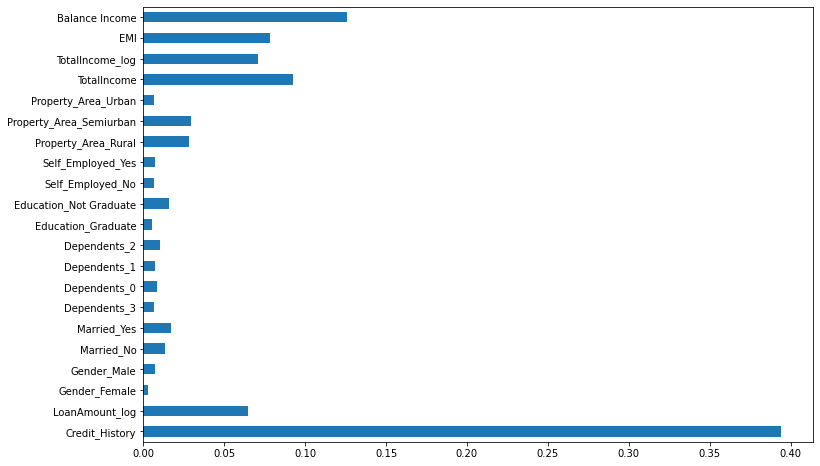

In [123]:
importances=pd.Series(model.feature_importances_,index=x.columns)
importances.plot(kind='barh',figsize=(12,8))